Goal:
Explore the loan approval ndataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
1. Why This Project?
- Learn data cleaning with Pandas.

- Use NumPy for calculations (mean, median, etc.).

- Visualize trends using Matplotlib and Seaborn.

- Understand the relationship between  features 


2.import libraries

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


3 Load datset

In [5]:
df=pd.read_csv('loan.csv')
df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


4.Exploring the Data

In [6]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID               0
Gender               13
Married               3
Dependents        

5.Data Cleaning

In [7]:
# fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)       
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



C:\Users\mrdee\AppData\Local\Temp\ipykernel_16960\23621515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\mrdee\AppData\Local\Temp\ipykernel_16960\23621515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

6.Analysis with Numpys and Pandas

In [8]:
# Average loan amount
avg_loan_amount = np.mean(df['LoanAmount'])
print("Average LoanAmount:", avg_loan_amount)
 
# Approval rate
approve_rate = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0).mean()
print("Overall Approval Rate:", approve_rate)
 
# Approval Status by Marital Status
approval_by_marital = df.groupby('Married')['Loan_Status'].apply(lambda x: (x == 'Y').mean())
print("Approval Rate by Marital Status:\n", approval_by_marital)

# Area having more loan requests
area_loan_requests = df['Property_Area'].value_counts()
print("Loan Requests by Property Area:\n", area_loan_requests)
 


Average LoanAmount: 145.75244299674267
Overall Approval Rate: 0.6872964169381107
Approval Rate by Marital Status:
 Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64
Loan Requests by Property Area:
 Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


7.Visualization by Matplot

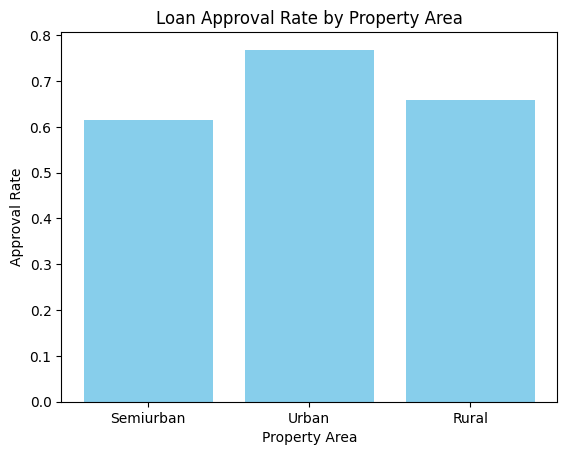

In [9]:
areas = area_loan_requests.index
approval_rates_by_area = df.groupby('Property_Area')['Loan_Status'].apply(lambda x: (x == 'Y').mean())
plt.bar(areas, approval_rates_by_area.values, color='skyblue')
plt.title("Loan Approval Rate by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Approval Rate")
plt.show()

# Insights from the "Loan Approval Rate by Property Area" plot:

- Semiurban areas have the highest loan approval rate among all property areas (≈ 76.8%).
- Urban areas have a moderate approval rate (≈ 65.8%), higher than Rural but lower than Semiurban.
- Rural areas have the lowest loan approval rate (≈ 61.5%).
- This suggests that applicants from Semiurban areas are more likely to get their loans approved compared to those from Urban or Rural areas.

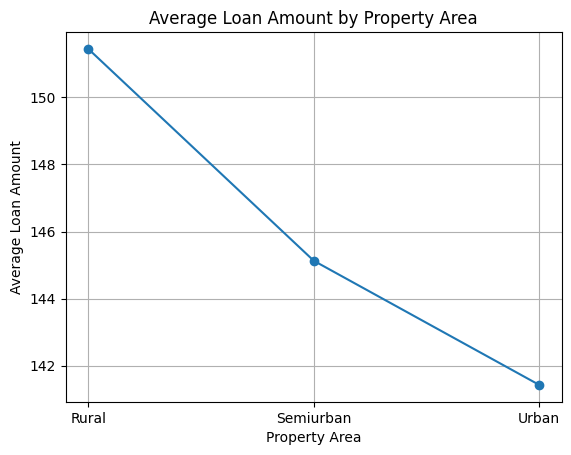

In [10]:
avg_loan_by_area = df.groupby('Property_Area')['LoanAmount'].mean()
plt.plot(avg_loan_by_area.index, avg_loan_by_area.values, marker='o')
plt.title("Average Loan Amount by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Average Loan Amount")
plt.grid(True)
plt.show()

# Insights from the "Average Loan Amount by Property Area" plot:

- Rural areas have the highest average loan amount among all property areas.
- Urban areas have the lowest average loan amount, while Semiurban areas are in between.
- This suggests that applicants from Rural areas tend to request or receive larger loans compared to those from Urban or Semiurban areas.
- The difference in average loan amounts may reflect varying property values, income levels, or loan requirements across different areas.

8 visualization with seaborn

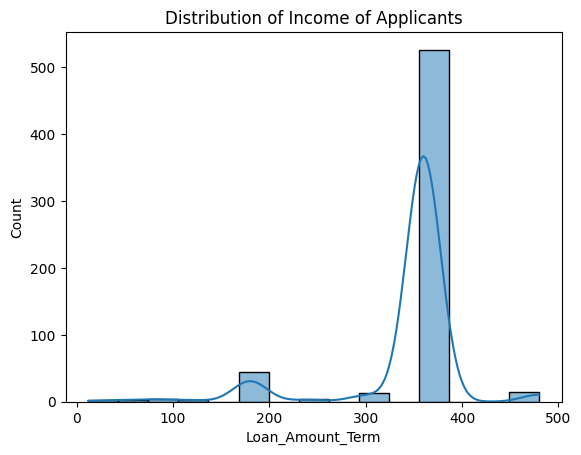

In [13]:
sns.histplot(df['Loan_Amount_Term'], bins=15, kde=True)
plt.title("Distribution of Loan Amount Term")
plt.show()

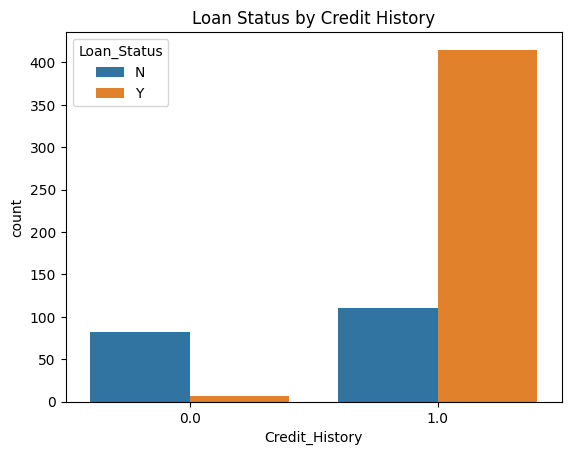

In [15]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.show()

# Insights from the "Loan Status by Credit History" plot:

- Applicants with a credit history (Credit_History = 1.0) have a significantly higher loan approval rate compared to those without a credit history (Credit_History = 0.0).
- The number of applicants with a positive credit history is much higher than those without.
- Very few applicants without a credit history get their loans approved, indicating that credit history is a crucial factor in loan approval decisions.
- This suggests that maintaining a good credit history greatly increases the chances of loan approval.

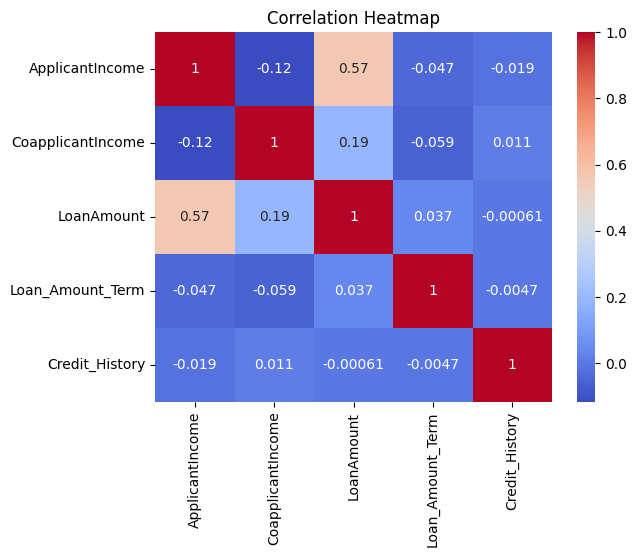

In [17]:
# Heatmap of correlation
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Insights from the "Correlation Heatmap":

- ApplicantIncome and LoanAmount show a moderate positive correlation, indicating that higher applicant incomes are generally associated with higher loan amounts.
- CoapplicantIncome has a weak positive correlation with LoanAmount, suggesting a minor influence on the loan amount.
- Credit_History has very low correlation with other numerical features, but as seen in previous plots, it is a strong predictor of loan approval.
- Loan_Amount_Term does not show significant correlation with other variables.
- Overall, most numerical features are not highly correlated with each other, indicating low multicollinearity in the dataset.